In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [2]:
# read in csv file
df = pd.read_csv('coorteeqsrafva.csv', sep=';', header=0, index_col=0)
df.head()

,diagnosi,ecg_id,ritmi,patient_id,age,sex,height,weight,nurse,site,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
0,STACH,10900,VA,15654.0,54.0,0,NaN,NaN,0.0,0.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/10000/10900_lr,records500/10000/10900_hr
1,AFLT,10900,AF,15654.0,54.0,0,NaN,NaN,0.0,0.0,...,False,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/10000/10900_lr,records500/10000/10900_hr
2,SR,8209,SR,12281.0,55.0,0,NaN,NaN,1.0,2.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/08000/08209_lr,records500/08000/08209_hr
3,STACH,17620,VA,2007.0,29.0,1,164.0,56.0,7.0,1.0,...,True,NaN,NaN,NaN,NaN,NaN,NaN,1,records100/17000/17620_lr,records500/17000/17620_hr
4,SBRAD,12967,VA,8685.0,57.0,0,NaN,NaN,0.0,0.0,...,False,NaN,", I-AVR,",NaN,NaN,NaN,NaN,1,records100/12000/12967_lr,records500/12000/12967_hr


In [3]:
print('Normal (SR) has a total of {} rows'.format(df.loc[df['ritmi'] == 'SR'].shape[0]))
print('Atrial Fibrillation (AF) has a total of {} rows'.format(df.loc[df['ritmi'] == 'AF'].shape[0]))
print('Other arrhythmia (VA) has a total of {} rows'.format(df.loc[df['ritmi'] == 'VA'].shape[0]))

Normal (SR) has a total of 2000 rows
Atrial Fibrillation (AF) has a total of 1587 rows
Other arrhythmia (VA) has a total of 2841 rows


In [4]:
# make a copy of the df
df = df.copy()

# drop columns
df = df.drop(columns=['ecg_id', 'patient_id', 'nurse', 'site', 'device', 'report', 'scp_codes', 'infarction_stadium1', 'infarction_stadium2', 'validated_by', 'second_opinion', 'initial_autogenerated_report', 'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats', 'pacemaker', 'filename_lr', 'filename_hr'])

# dictionary to hold values for ritmi column
num_di = {'SR': 0, 'AF': 1, 'VA': 2}

# replace SR with 0, AF with 1, VA with 2
df = df.replace({'ritmi': num_di})

# dictionary to hold values for validated_by_human column
bool_di = {False: 0, True: 1}

# replace False with 0, True with 1
df = df.replace({'validated_by_human': bool_di})

In [5]:
df

,diagnosi,ritmi,age,sex,height,weight,recording_date,heart_axis,validated_by_human,strat_fold
0,STACH,2,54.0,0,NaN,NaN,1993-09-01 11:31:17,MID,0,6
1,AFLT,1,54.0,0,NaN,NaN,1993-09-01 11:31:17,MID,0,6
2,SR,0,55.0,0,NaN,NaN,1992-06-09 15:52:36,LAD,1,10
3,STACH,2,29.0,1,164.0,56.0,1997-02-08 18:33:30,NaN,1,1
4,SBRAD,2,57.0,0,NaN,NaN,1994-09-13 10:21:14,MID,0,1
...,...,...,...,...,...,...,...,...,...,...
6423,SARRH,2,81.0,0,178.0,70.0,1990-05-06 09:02:55,LAD,1,4
6424,STACH,2,88.0,0,152.0,45.0,1997-10-01 08:41:32,NaN,1,10
6425,SR,0,83.0,1,NaN,NaN,1989-12-28 18:29:31,LAD,1,5
6426,AFIB,1,75.0,1,177.0,80.0,1987-08-05 10:15:05,NaN,1,7


In [6]:
# fill missing values
df['height'].fillna((df['height'].mean()), inplace=True)
df['weight'].fillna((df['weight'].mean()), inplace=True)
df['heart_axis'] = df['heart_axis'].fillna(0)

In [7]:
# define a function to recode age
def get_age_group(age):
    age_group = ''
    if (age >=0 and age <=9):
        age_group = '0-9 Years'
    elif (age >= 10 and age <=19):
        age_group = '10-19 Years'
    elif (age >=20 and age <= 29):
        age_group = '20-29 Years'
    elif (age >=30 and age <= 39):
        age_group = '30-39 Years'
    elif (age >= 40 and age <= 49):
        age_group = '40-49 Years'
    elif (age >= 50 and age <= 59):
        age_group = '50-59 Years'
    elif (age >= 60 and age <= 69):
        age_group = '60-69 Years'
    elif (age >= 70 and age <= 79):
        age_group = '70-79 Years'
    elif (age >= 80):
        age_group = '80+ Years'
    else:
        age_group = 'Missing'
    return age_group

# add the new column called age_group and apply the above function
df['age_group'] = df['age'].apply(get_age_group)

In [8]:
# define a function to recode height
def get_height_group(height):
    height_group = ''
    if (height < 150.0):
        height_group = '<1.50m'
    elif (height >= 150.0 and height <= 159.9):
        height_group = '1.50m +'
    elif (height >= 160.0 and height <= 169.9):
        height_group = '1.60m +'
    elif (height >= 170.0 and height <= 179.9):
        height_group = '1.70m +'
    elif (height >= 180.0 and height <= 189.9):
        height_group = '1.80m +'
    elif (height >= 190.0 and height <= 199.9):
        height_group = '1.90m +'
    else: 
        height_group = 'Missing'
    return height_group

# add the new column called age_group and apply the above function
df['height_group'] = df['height'].apply(get_height_group)

In [9]:
# define a function to recode weight
def get_weight_group(weight):
    weight_group = ''
    if (weight < 60.0):
        weight_group = '<60kg'
    elif (weight >= 60.0 and weight <= 69.9):
        weight_group = '60kg +'
    elif (weight >= 70.0 and weight <= 79.9):
        weight_group = '70kg +'
    elif (weight >= 80.0 and weight <= 89.9):
        weight_group = '80kg +'
    elif (weight >= 90.0 and weight <= 99.9):
        weight_group = '90kg +'
    elif (weight >= 100.0):
        weight_group = '100kg +'
    else: 
        weight_group = 'Missing'
    return weight_group

# add the new column called age_group and apply the above function
df['weight_group'] = df['weight'].apply(get_weight_group)

In [10]:
# get year from recording_date
df['recording_year'] = pd.to_datetime(df['recording_date']).dt.to_period('Y')

In [11]:
pd = pd.DataFrame(df.sum()[2:-1])
pd

/tmp/ipykernel_118075/2244920867.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd = pd.DataFrame(df.sum()[2:-1])


,0
age,394766.0
sex,3075
height,1072166.975348
weight,448943.38056
recording_date,1993-09-01 11:31:171993-09-01 11:31:171992-06-...
validated_by_human,4559
strat_fold,35515
age_group,50-59 Years50-59 Years50-59 Years20-29 Years50...
height_group,1.60m +1.60m +1.60m +1.60m +1.60m +1.50m +1.60...


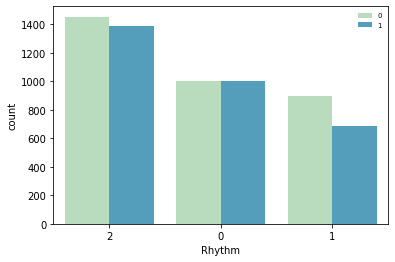

In [12]:
# countplot for ritmi, grouped by sex
sns.countplot(x='ritmi', data=df, hue='sex', order = df['ritmi'].value_counts().index, palette='GnBu')
plt.xlabel('Rhythm')
plt.legend(fontsize='x-small', title_fontsize='5', framealpha=0)
plt.show()

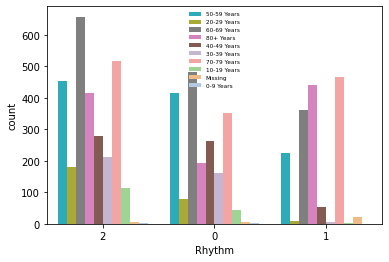

In [13]:
# countplot for ritmi, grouped by age
sns.countplot(x='ritmi', data=df, hue='age_group', order = df['ritmi'].value_counts().index, palette='tab20_r')
plt.xlabel('Rhythm')
plt.legend(fontsize='xx-small', title_fontsize='8', framealpha=0, loc='best')
plt.show()

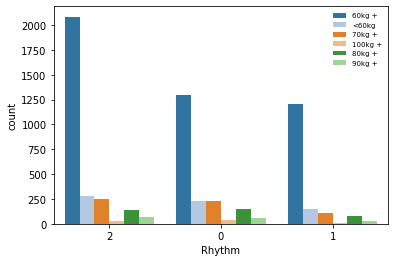

In [14]:
# countplot for ritmi, grouped by weight
sns.countplot(x='ritmi', data=df, hue='weight_group', order = df['ritmi'].value_counts().index, palette='tab20')
plt.xlabel('Rhythm')
plt.legend(fontsize='x-small', title_fontsize='5', framealpha=0, loc='upper right')
plt.show()

<AxesSubplot:>

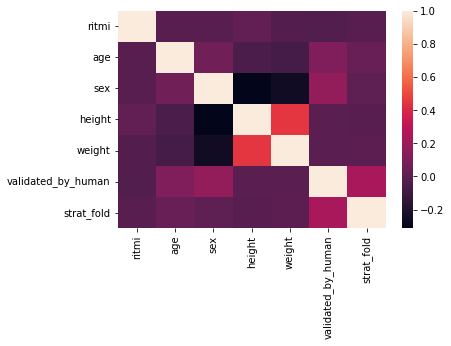

In [15]:
corr = df.corr()
sns.heatmap(corr)

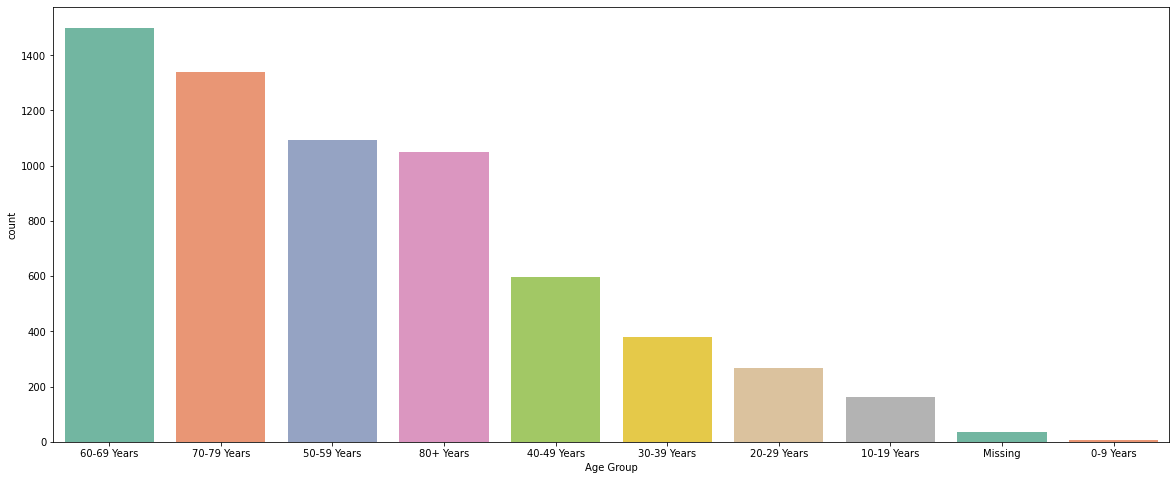

In [22]:
# countplot for age column
plt.figure(figsize=(20, 8))
sns.countplot(x='age_group', data=df, order = df['age_group'].value_counts().index, palette='Set2')
plt.xlabel('Age Group')
plt.show()

In [17]:
# get number of rows for each category
df['age_group'].value_counts().to_frame()

,age_group
60-69 Years,1500
70-79 Years,1338
50-59 Years,1093
80+ Years,1049
40-49 Years,597
30-39 Years,380
20-29 Years,269
10-19 Years,162
Missing,34
0-9 Years,6


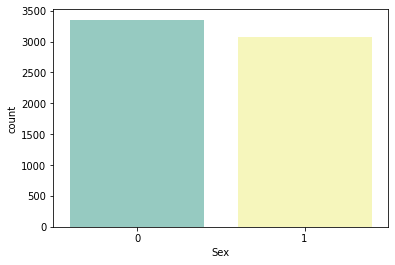

In [18]:
# countplot for sex column
sns.countplot(x='sex', data=df, order = df['sex'].value_counts().index, palette='Set3')
plt.xlabel('Sex')
plt.show()

In [19]:

# get number of rows for each category
df['sex'].value_counts().to_frame()

,sex
0,3353
1,3075


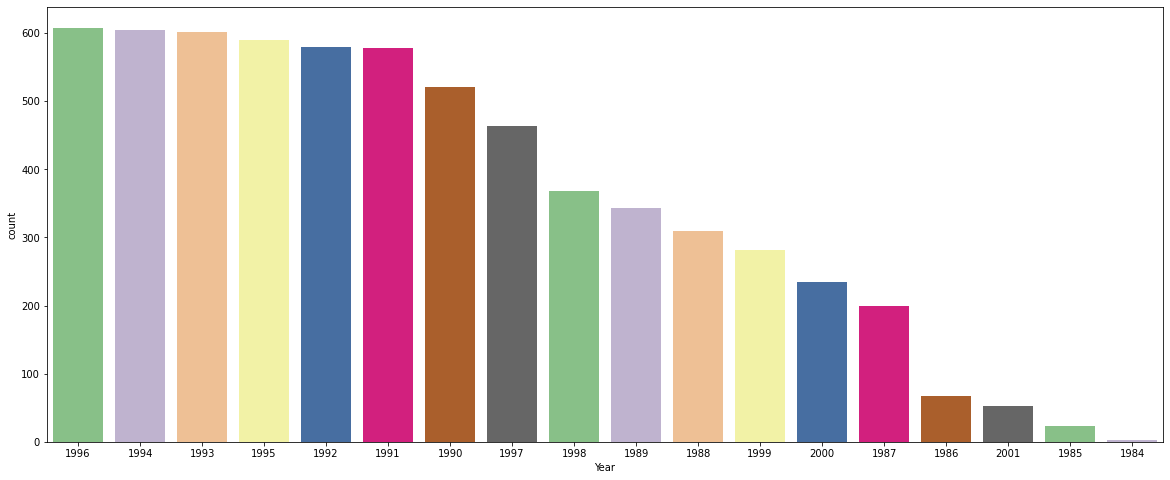

In [23]:
# countplot for recording year column
plt.figure(figsize=(20, 8))
sns.countplot(x='recording_year', data=df, order = df['recording_year'].value_counts().index, palette='Accent')
plt.xlabel('Year')
plt.show()

In [21]:
# get number of rows for each category
df['recording_year'].value_counts().to_frame()

,recording_year
1996,608
1994,605
1993,601
1995,590
1992,580
1991,578
1990,521
1997,463
1998,368
1989,343


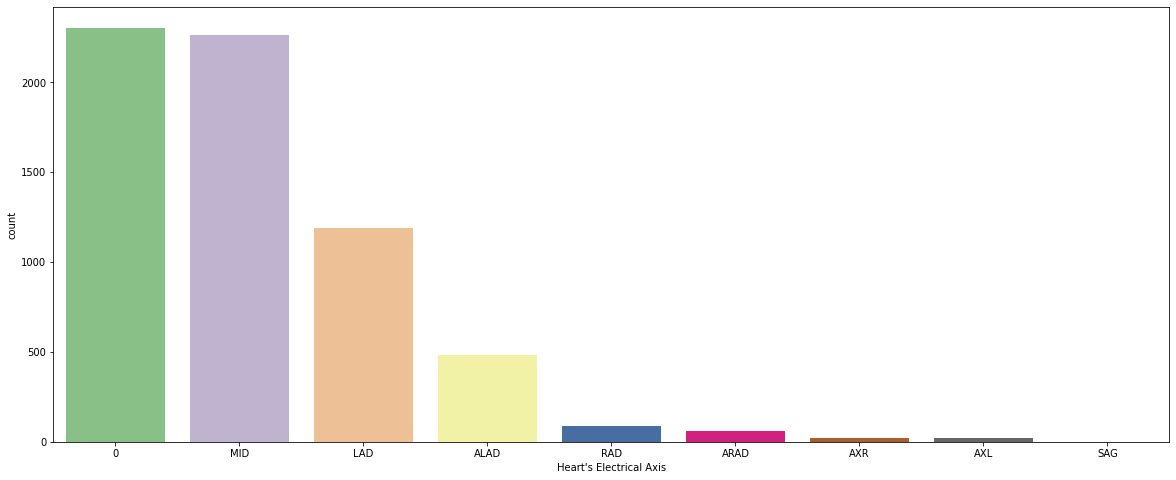

In [24]:
# countplot for heart_axis column
plt.figure(figsize=(20, 8))
sns.countplot(x='heart_axis', data=df, order = df['heart_axis'].value_counts().index, palette='Accent')
plt.xlabel('Heart\'s Electrical Axis')
plt.show()

In [23]:
# get number of rows for each category
df['heart_axis'].value_counts().to_frame()

,heart_axis
0,2304
MID,2262
LAD,1187
ALAD,482
RAD,87
ARAD,60
AXR,23
AXL,22
SAG,1


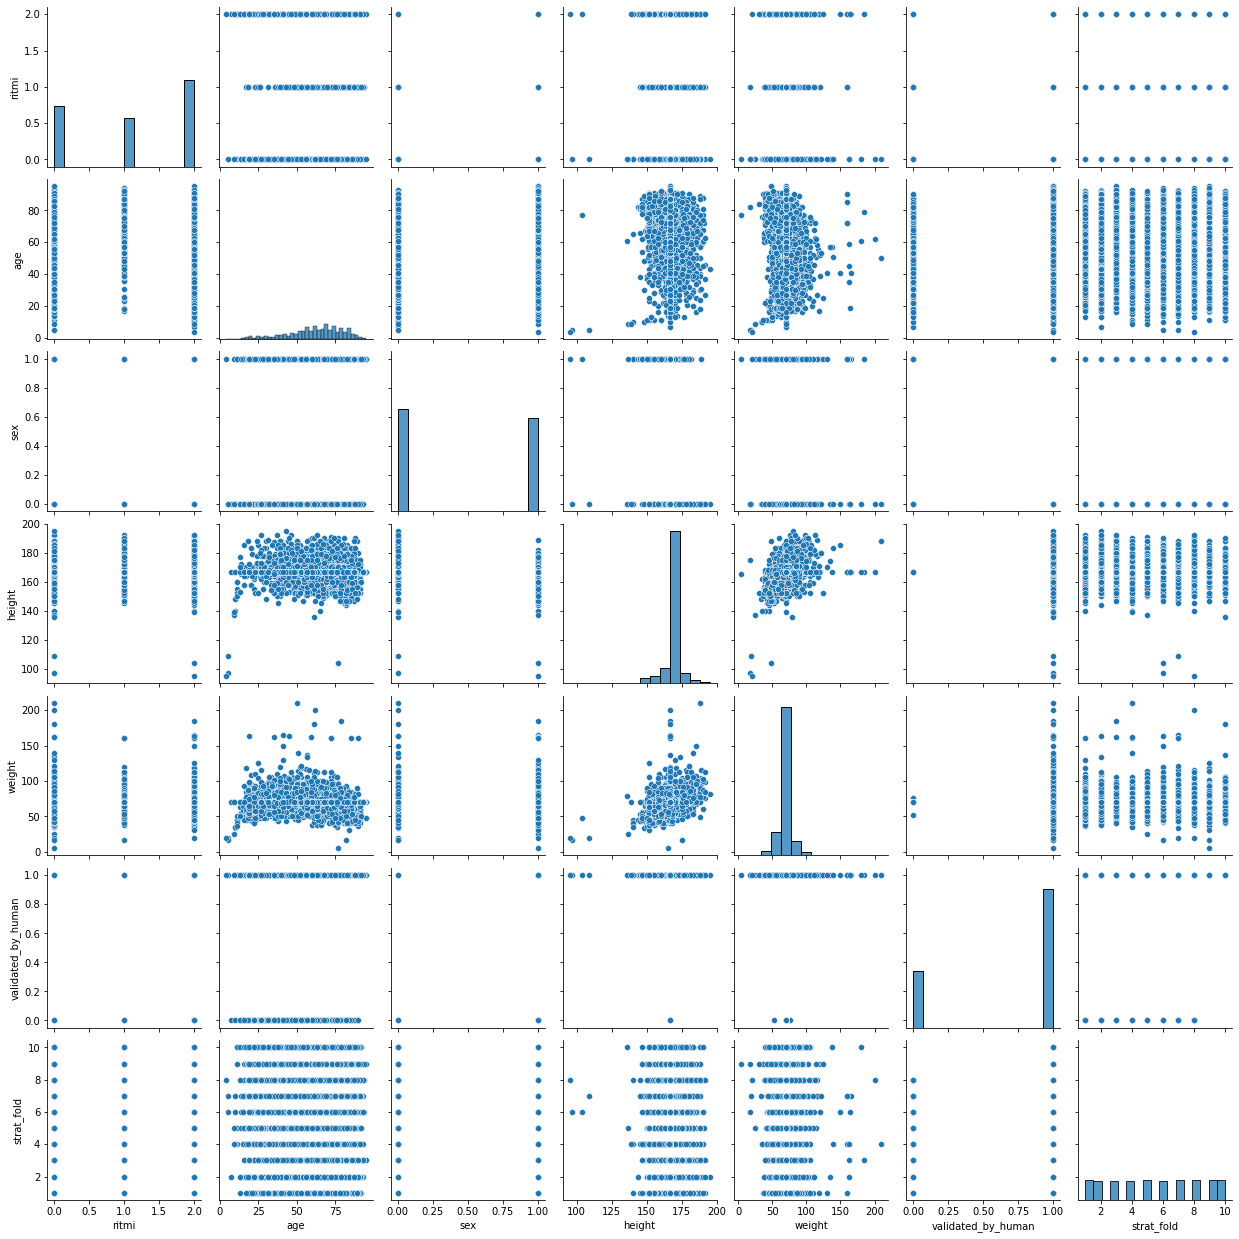

In [24]:
# plot pairwise relationships in a dataset
sns.pairplot(data=df)

In [25]:
df

,diagnosi,ritmi,age,sex,height,weight,recording_date,heart_axis,validated_by_human,strat_fold,age_group,height_group,weight_group,recording_year
0,STACH,2,54.0,0,166.796356,69.841845,1993-09-01 11:31:17,MID,0,6,50-59 Years,1.60m +,60kg +,1993
1,AFLT,1,54.0,0,166.796356,69.841845,1993-09-01 11:31:17,MID,0,6,50-59 Years,1.60m +,60kg +,1993
2,SR,0,55.0,0,166.796356,69.841845,1992-06-09 15:52:36,LAD,1,10,50-59 Years,1.60m +,60kg +,1992
3,STACH,2,29.0,1,164.000000,56.000000,1997-02-08 18:33:30,0,1,1,20-29 Years,1.60m +,<60kg,1997
4,SBRAD,2,57.0,0,166.796356,69.841845,1994-09-13 10:21:14,MID,0,1,50-59 Years,1.60m +,60kg +,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6423,SARRH,2,81.0,0,178.000000,70.000000,1990-05-06 09:02:55,LAD,1,4,80+ Years,1.70m +,70kg +,1990
6424,STACH,2,88.0,0,152.000000,45.000000,1997-10-01 08:41:32,0,1,10,80+ Years,1.50m +,<60kg,1997
6425,SR,0,83.0,1,166.796356,69.841845,1989-12-28 18:29:31,LAD,1,5,80+ Years,1.60m +,60kg +,1989
6426,AFIB,1,75.0,1,177.000000,80.000000,1987-08-05 10:15:05,0,1,7,70-79 Years,1.70m +,80kg +,1987


<Figure size 2880x2160 with 0 Axes>

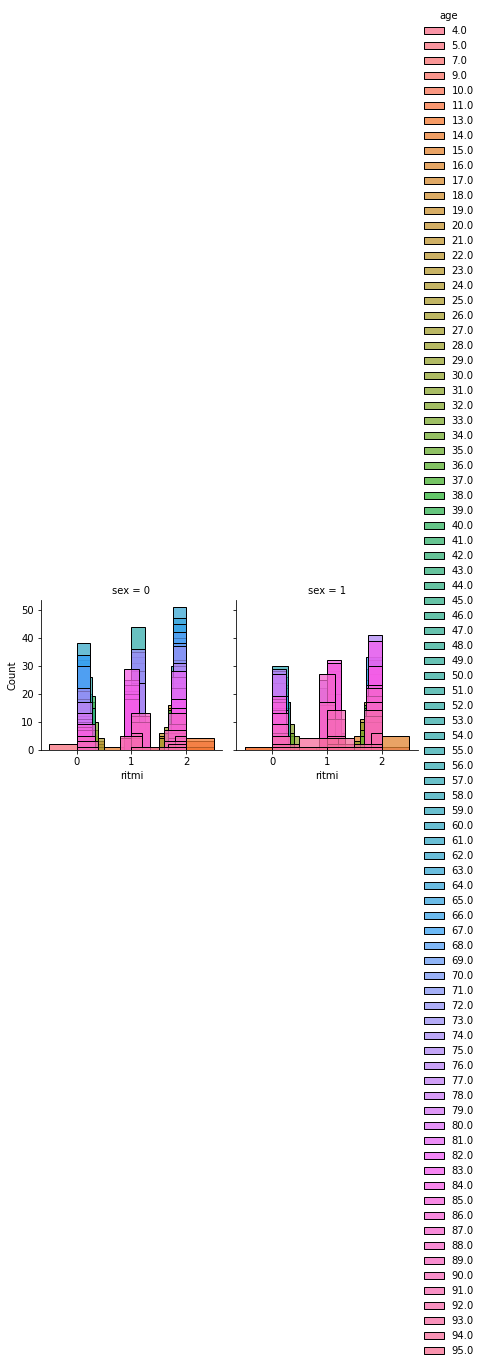

In [27]:
plt.figure(figsize=(40, 30))
g = sns.FacetGrid(df, col="sex", hue="age")
g.map(sns.histplot, "ritmi")
g.add_legend()